**Restaurant Rating Prediction**

Bangalore has a unique food culture. Restaurants from all over the world can be found here in Bengaluru, with various kind of cuisines.

Some might even say that Bangalore is the best place for foodies. The food industry is always at a rise in Bangalore, with 12,000 plus restaurants currently active in the city, the number is still increasing. The growing number of restaurants and dishes in Bangalore is what attracts me to inspect the data to get some insights, some interesting facts and figures.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
cd Downloads

C:\Users\91976\Downloads


In [6]:
df=pd.read_csv("zomato.csv")

In [7]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.shape 

(51717, 17)

In [9]:
col = ['url', 'address', 'phone', 'dish_liked', 'menu_item']
df.drop(col, inplace=True, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   reviews_list                 51717 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7757
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [14]:
def filter_rate(val):
    if (val=='-' or val=='NEW'):
        return np.nan
    else:
        val=str(val).split('/')[0] 
    return float(val)

df['rate']=df['rate'].apply(filter_rate)

df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51645, dtype: float64

In [15]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [19]:
df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))

In [20]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Number_of_cuisines_offered
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,1
51713,Vinod Bar And Restaurant,No,No,3.700526,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield,1
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700526,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield,1
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,1


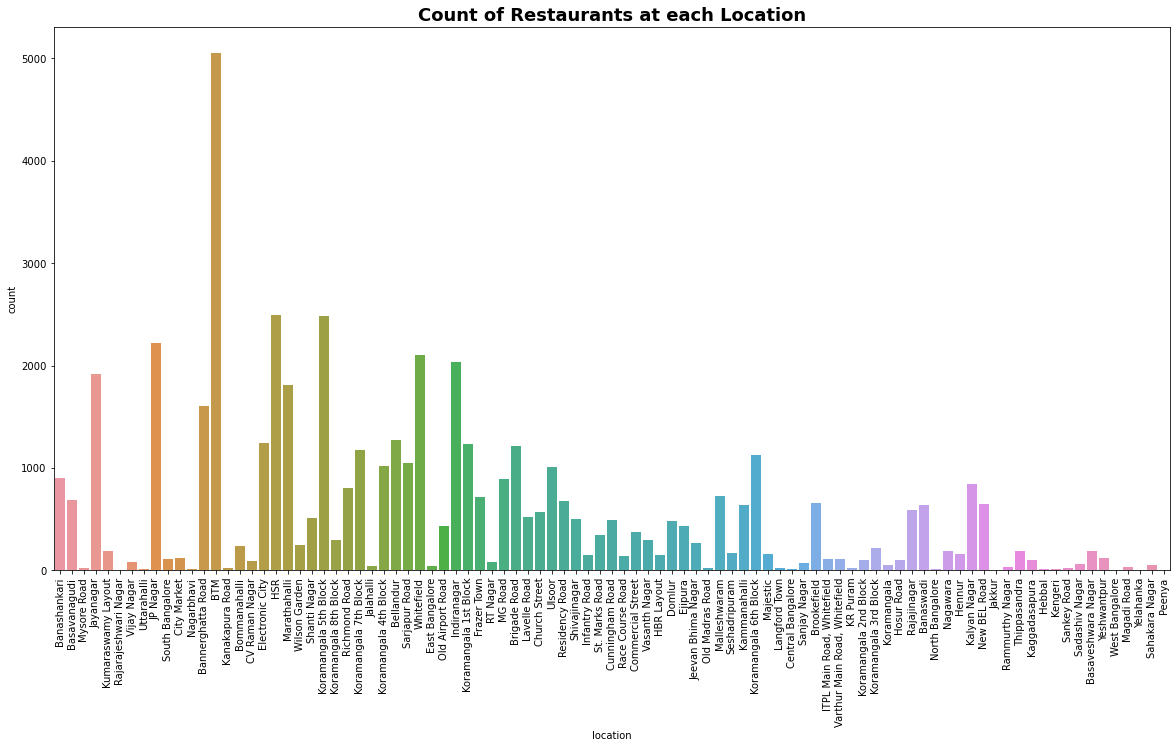

In [109]:
plt.figure(figsize=(20,10))
sns.countplot(x='location', data=df)
plt.title('Count of Restaurants at each Location', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

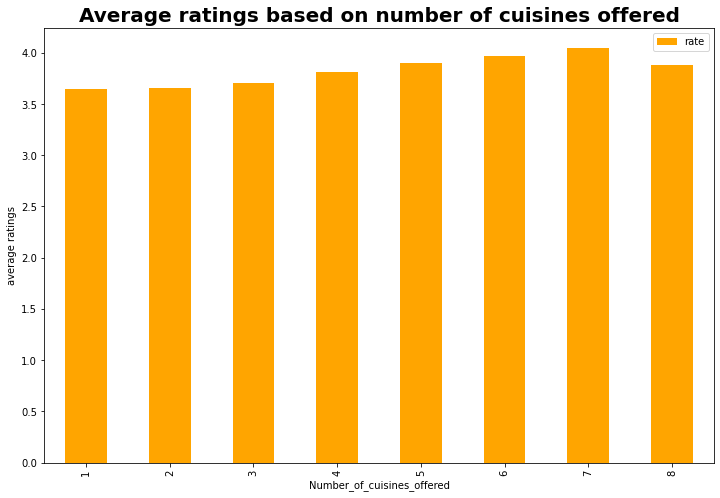

In [112]:
a = df.groupby('Number_of_cuisines_offered').agg({'rate':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#FFA500')
plt.title('Average ratings based on number of cuisines offered', fontsize=20, fontweight='bold')
plt.ylabel('average ratings')
plt.legend()
plt.show()

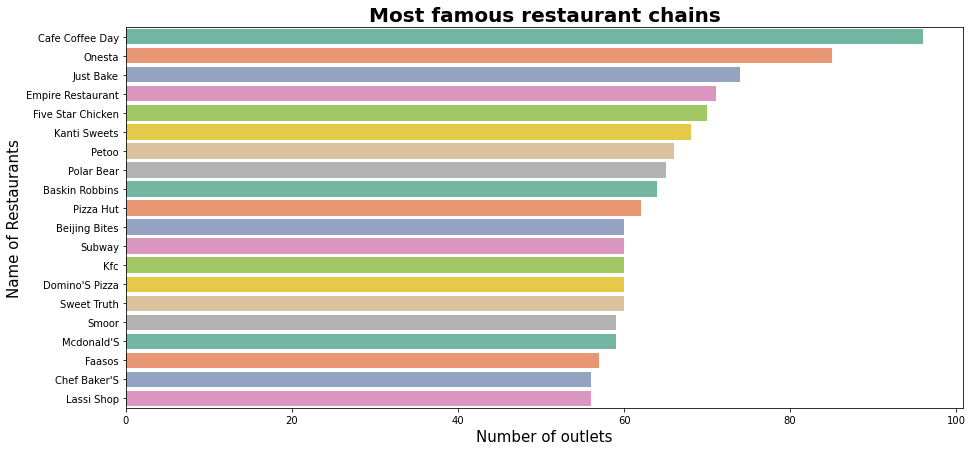

In [111]:
plt.figure(figsize=(15,7))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette='Set2')
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.title("Most famous restaurant chains", fontsize=20, fontweight='bold')
plt.show()

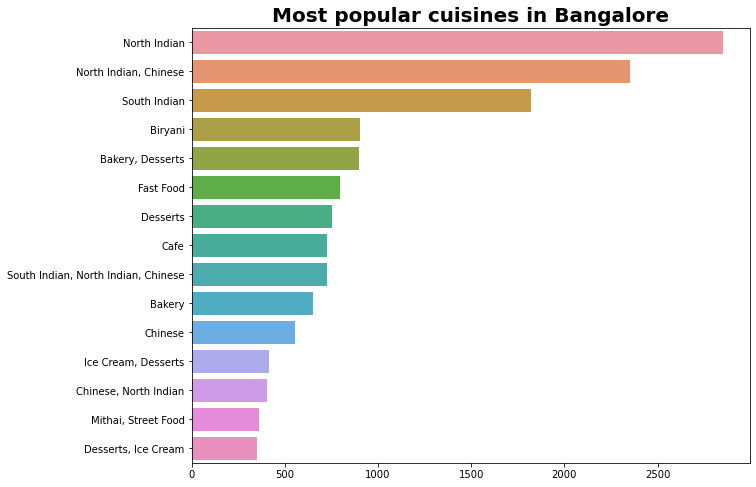

In [25]:
plt.figure(figsize=(10,8))
df_cuisines = df['cuisines'].value_counts()[:15]
sns.barplot(x = df_cuisines.values, y=df_cuisines.index)
plt.title('Most popular cuisines in Bangalore', fontsize=20, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Restaurants delivering online or not')

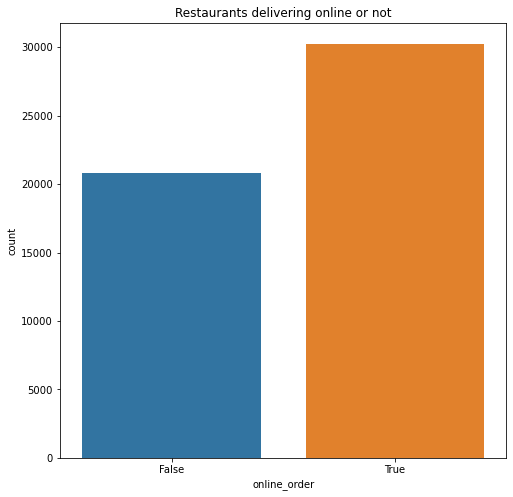

In [115]:
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Restaurants delivering online or not')

In [36]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Number_of_cuisines_offered
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2


In [46]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'type', 'city',
       'Number_of_cuisines_offered'],
      dtype='object')

In [94]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

data = Encode(df.copy())
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city,Number_of_cuisines_offered
0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,1
4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,1


In [102]:
x = data.iloc[:,[1,2,4,5,6,7,8,12]]
y = data['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=350)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,Number_of_cuisines_offered
36333,1,1,26,58,2,159,400.0,0
15880,0,1,41,13,7,54,500.0,2
106,1,1,8,0,2,78,300.0,3
2394,0,1,827,13,0,385,500.0,2
6680,0,0,1110,40,30,928,1.2,1


In [103]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.268092676168478

In [104]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8400617344581196

In [105]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.8751842492774052

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)



r2_score(y_test,y_predict)

0.5170407128984178

In [107]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


r2_score(y_test,y_predict)

0.9571445143170515

In [108]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost','Extra Tree Regressor'],
    'Score' : [reg.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test),
               gbr.score(x_test, y_test),ETree.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Extra Tree Regressor,0.957145
2,Random Forest,0.875184
1,Decision Tree,0.840062
3,Gradient Boost,0.517041
0,Linear Regression,0.268093
